# ISMB figures notebook

In [2]:
include("engines/init.jl")
include("engines/data_processing.jl")
include("engines/deep_learning.jl")
include("engines/cross_validation.jl")

  Activating project at `~/vae_cox`


concordance_index (generic function with 1 method)

## Data preparation and processing

In [9]:
# LGG (Brain glioma) data processing
# create_fetch_data_file(;prefix = "TCGA_LGG")
# m, samples, genes, biotypes = merge_GDC_data("Data/GDC_raw/TCGA_LGG")

Processing: 19.45525291828794%


Processing: 38.91050583657588%


Processing: 58.36575875486382%


Processing: 77.82101167315176%


Processing: 97.27626459143968%


(Float32[1645.0 1.0 … 0.0 25.0; 1664.0 6.0 … 2.0 94.0; … ; 1994.0 0.0 … 0.0 81.0; 1166.0 2.0 … 4.0 63.0], ["001ad307-4ad3-4f1d-b2fc-efc032871c7e", "0061e9ef-df6a-414e-af64-c88f8192e2d3", "0073a136-d5f4-4fd6-88f9-711768f2abc6", "00b18ad6-ff70-41fe-8f4d-0763ac8f28b9", "010aac75-3bfe-4bf2-b866-af0f2d92f125", "0167cf11-74be-4701-ab9a-4e057d4bb545", "019c5de9-74fd-48b7-95a3-227532e16c5a", "01a13aba-74a4-4895-a5ad-e5119925c202", "01c4ca12-ac08-41dd-9e4f-bfb0971688a2", "02194c0c-e2c1-4ea7-994a-07b61b2575e2"  …  "fc8828ae-484d-4fc8-a168-f8bc58ad65b9", "fcd9e1c4-bddb-4856-844c-03df48fba499", "fcf14e9d-4671-453d-b8e0-5008e916f56d", "fdff46a7-f92a-45cf-8756-6c73a406c923", "fe5c5c11-ef39-4907-9a70-67f37bb62fd7", "fea46eef-6b7f-44c3-93bf-2dec16bdeb79", "febe2ce5-737b-43b8-bc70-4194fe3ed5fb", "fee2114e-f723-4374-91f8-f1dcc6b3eaee", "ffcec8e5-9fd3-4b42-a7cb-74761f713cf4", "fff304a2-113f-499d-a88c-9d3660c348d9"], Union{Missing, String31}[String31("TSPAN6"), String31("TNMD"), String31("DPM1"), String31

In [23]:
# LGG (Brain glioma) data processing
# create_fetch_data_file(;prefix = "TCGA_OV")
m, samples, genes, biotypes = merge_GDC_data("Data/GDC_raw/TCGA_OV")

Processing: 24.0%


Processing: 47.0%


Processing: 71.0%


Processing: 95.0%


(Float32[1954.0 5.0 … 14.0 217.0; 896.0 22.0 … 1.0 32.0; … ; 2851.0 1.0 … 1.0 116.0; 6251.0 3.0 … 5.0 112.0], ["005a6517-2e5a-4ea3-ab36-531522723607", "01ea6354-137b-47f3-9021-a01a382b1147", "02594e5e-8751-47c1-9245-90c66984b665", "02d9aa2e-b16a-48ea-a420-5daed9fd51a6", "0484a929-7a7f-4926-8d25-470ddab082ec", "04ecaf38-0232-4dcd-9242-308a22cc1331", "05019013-7ea5-4905-ac79-901146ba2ee2", "05263959-c4f5-4540-b6d2-d8c8a128861f", "05ba5839-e00a-4a9e-8ba3-ecb490781e62", "062982f8-9f49-425a-99e9-008af5ed9040"  …  "f9c835db-2ab6-4bf5-826f-48723493c0ec", "f9f44f86-10c7-4473-b156-5afbfa9a2ad0", "fbb45305-de8d-4baf-8bd0-047b29c2e9d9", "fd4740db-76a8-4362-be71-7b609479bb67", "fdf83fdf-dfbb-4306-9a1b-b4487d18b402", "fe0e3851-d8cb-4533-9536-b4826cd25f87", "fe402983-70da-44db-b7b1-c32702ddde26", "feda41d8-ca56-425d-b149-4d5485328107", "fef1696c-a8f4-4db6-8615-e486522baaaa", "ff844242-7559-4b07-b09e-69ea40e5ac6b"], Union{Missing, String31}[String31("TSPAN6"), String31("TNMD"), String31("DPM1"), Stri

In [39]:

basepath = "Data/GDC_raw"
FILES = "$basepath/TCGA_OV_clinical.json"
J = JSON.parsefile(FILES)
submitids, case_ids, surves, survts, labels = [], [],[],[], []
counter = 0
for (i,F) in enumerate(J)
    if "demographic" in keys(F) 

    case_id = F["case_id"]
    submitter_ID = split(F["demographic"]["submitter_id"],"_")[1]
    surve = F["demographic"]["vital_status"] == "Dead" ? 1 : 0 # status 
    if surve == 1 && "days_to_death" in keys(F["demographic"])
        survt = Int(F["demographic"]["days_to_death"]) 
        push!(submitids, submitter_ID)
        push!(case_ids, case_id)
        push!(surves, surve)
        push!(survts, survt)
        morph = F["diagnoses"][1]["morphology"]
        push!(labels, morph) 
        #println("$i $(case_id) $submitter_ID $surve $survt")
    elseif surve == 0
        diagnoses = F["diagnoses"]
        if F["diagnoses"][1]["days_to_last_follow_up"] != nothing
            survt = Int(F["diagnoses"][1]["days_to_last_follow_up"])
            push!(submitids, submitter_ID)
            push!(case_ids, case_id)
            push!(surves, surve)
            push!(survts, survt)
            morph = F["diagnoses"][1]["morphology"]
            push!(labels, morph) 
            #println("$i $(case_id) $submitter_ID $surve $survt")
        end 
    end
    #ttms = [x["treatment_or_therapy"] == "yes" for x in F["diagnoses"][1]["treatments"]]
    
    end 
    end 
    


In [46]:
CLIN_df = DataFrame(:case_id=>case_ids, :submitid=>submitids,:survt=>Array{Int}(survts),:surve=>Array{Int}(surves), :morph=>labels)
tmp = DataFrame(:case_id=>samples, :II=>collect(1:length(samples)))
samples_df = sort(innerjoin(tmp, CLIN_df, on = :case_id), :II)

Row,case_id,II,submitid,survt,surve,morph
,String,Int64,Any,Int64,Int64,Any
1,005a6517-2e5a-4ea3-ab36-531522723607,1,TCGA-61-1740,74,1,8441/3
2,01ea6354-137b-47f3-9021-a01a382b1147,2,TCGA-29-1766,1199,1,8441/3
3,02594e5e-8751-47c1-9245-90c66984b665,3,TCGA-09-2051,1919,0,8441/3
4,02d9aa2e-b16a-48ea-a420-5daed9fd51a6,4,TCGA-24-1427,147,0,8441/3
5,0484a929-7a7f-4926-8d25-470ddab082ec,5,TCGA-04-1365,947,0,8441/3
6,04ecaf38-0232-4dcd-9242-308a22cc1331,6,TCGA-61-1733,967,0,8441/3
7,05019013-7ea5-4905-ac79-901146ba2ee2,7,TCGA-29-1688,2400,1,8441/3
8,05263959-c4f5-4540-b6d2-d8c8a128861f,8,TCGA-61-2104,2338,0,8441/3
9,05ba5839-e00a-4a9e-8ba3-ecb490781e62,9,TCGA-24-1422,23,1,8441/3


In [47]:
CLIN_df = DataFrame(:case_id=>case_ids, :submitid=>submitids,:survt=>Array{Int}(survts),:surve=>Array{Int}(surves), :morph=>labels)
samples_df = sort(innerjoin(DataFrame(:case_id=>samples, :II=>collect(1:length(samples))), CLIN_df, on = :case_id), :II)
outfilename = "Data/TCGA_OV_tpm_n$(size(samples_df)[1])_btypes_labels_surv.h5"
outfile = h5open(outfilename, "w")
outfile["data"] = log10.(m[samples_df.II,:] .+ 1) 
outfile["samples"] = Array{String}(samples[samples_df.II]) 
outfile["labels"] = Array{String}(samples_df.morph) 
outfile["genes"] = Array{String}(genes) 
outfile["biotypes"] = Array{String}(biotypes)
outfile["survt"] = samples_df.survt
outfile["surve"] = samples_df.surve
close(outfile)

In [42]:
LGG = MLSurvDataset("Data/TCGA_LGG_tpm_n513_btypes_labels_surv.h5")

MLSurvDataset(Float32[3.21643 0.30103 … 0.0 1.4149734; 3.2214143 0.845098 … 0.47712126 1.9777236; … ; 3.299943 0.0 … 0.0 1.9138138; 3.067071 0.47712126 … 0.69897 1.80618], ["001ad307-4ad3-4f1d-b2fc-efc032871c7e", "0061e9ef-df6a-414e-af64-c88f8192e2d3", "0073a136-d5f4-4fd6-88f9-711768f2abc6", "00b18ad6-ff70-41fe-8f4d-0763ac8f28b9", "010aac75-3bfe-4bf2-b866-af0f2d92f125", "0167cf11-74be-4701-ab9a-4e057d4bb545", "019c5de9-74fd-48b7-95a3-227532e16c5a", "01a13aba-74a4-4895-a5ad-e5119925c202", "01c4ca12-ac08-41dd-9e4f-bfb0971688a2", "02194c0c-e2c1-4ea7-994a-07b61b2575e2"  …  "fc8828ae-484d-4fc8-a168-f8bc58ad65b9", "fcd9e1c4-bddb-4856-844c-03df48fba499", "fcf14e9d-4671-453d-b8e0-5008e916f56d", "fdff46a7-f92a-45cf-8756-6c73a406c923", "fe5c5c11-ef39-4907-9a70-67f37bb62fd7", "fea46eef-6b7f-44c3-93bf-2dec16bdeb79", "febe2ce5-737b-43b8-bc70-4194fe3ed5fb", "fee2114e-f723-4374-91f8-f1dcc6b3eaee", "ffcec8e5-9fd3-4b42-a7cb-74761f713cf4", "fff304a2-113f-499d-a88c-9d3660c348d9"], ["TSPAN6", "TNMD", "DPM

In [2]:
#process_tall( "Data/TARGET_ALL_tpm_n264_btypes_labels.h5")
TALL = MLDataset( "Data/TARGET_ALL_tpm_n264_btypes_labels.h5")

MLDataset(Float32[0.0 0.0 … 0.30103 1.0791812; 0.60206 0.0 … 0.30103 1.230449; … ; 0.0 0.0 … 0.0 1.30103; 2.075547 0.0 … 0.30103 1.20412], ["00c0941a-ac70-5bb3-9777-c66e02d56138", "01c36e9b-3b96-5dec-9730-52bb9ad7341c", "0307b7ec-0d8c-533e-bb0c-eb08a0a59cc7", "031abec9-1e5e-5650-8a1c-1f6a12c1a1b5", "03938dc3-ab81-51d1-9d59-98f9814d5de4", "04a06139-beea-5f5d-b32b-a6dfdbade4a9", "05cce21f-d974-598d-bba9-4d3a25dcd2a5", "090655f5-48ad-5f3a-89dd-a359e585659b", "0c549fb9-b3ab-5626-b7ef-70c820fb47bf", "140084b3-ae90-5297-87d0-7c0c911b3dc2"  …  "fa88f9d8-cdd1-59ab-8103-86ca056bbd8a", "fad82c17-6f3b-555f-9f3c-dd7a2a9a387a", "fc5ef4cd-03b6-5b41-98e9-b56167c588dc", "fd1ea81a-7989-58fe-9320-6b38211f8af0", "fd454943-0694-5e02-ab26-2da80182dcc6", "fe7516dc-0eea-517d-857f-ea806724cfd8", "ffe4cc20-4868-576a-9076-89002bb31949", "fff24b87-640b-57f7-a477-79604d87c373", "fff5223f-86c5-5966-a055-bbd8234bf6fe", "fff8f3f7-b6f9-5d3c-9f84-3f03c734a235"], ["TSPAN6", "TNMD", "DPM1", "SCYL3", "C1orf112", "FGR", "

In [14]:
# process_brca("Data/TCGA_BRCA_tpm_n1050_btypes_labels.h5")
BRCA = MLDataset("Data/TCGA_BRCA_tpm_n1050_btypes_labels.h5")

MLDataset(Float32[2.628389 0.60206 … 0.47712126 1.30103; 3.3195224 2.4843 … 0.90309 1.3617278; … ; 3.2151086 1.0413927 … 0.0 1.0791812; 3.328991 1.0 … 0.60206 1.5563025], ["001cef41-ff86-4d3f-a140-a647ac4b10a1", "0045349c-69d9-4306-a403-c9c1fa836644", "00807dae-9f4a-4fd1-aac2-82eb11bf2afb", "00a2d166-78c9-4687-a195-3d6315c27574", "00b11ca8-8540-4a3d-b602-ec754b00230b", "011b9b2d-ebe5-42bf-9662-d922faccc7a1", "01263518-5f7c-49dc-8d7e-84b0c03a6a63", "0130d616-885e-4a6c-9d03-2f17dd692a05", "01674b2c-5cf2-478f-84a1-f69c39f47bd4", "016caf42-4e19-4444-ab5d-6cf1e76c4afa"  …  "fb57c598-b45b-478a-9d34-ca1f050d5b7c", "fbee40f1-d6d8-4156-8d42-36e09bb9f095", "fc18d029-9be2-4fa0-9aef-6d647dc55f0b", "fcef8cb5-fb2c-4bfb-82cd-6b9f3145182c", "fd0b1b8b-1a76-480a-b61c-d176e4e02c6b", "fe15c48b-116d-461e-9b40-68514730fd18", "fe2cd610-aa52-4789-ac62-7683281bb22f", "fe7f74b8-20f4-4471-91dc-4cca8c68e5c0", "fec0da58-1047-44d2-b6d1-c18cceed43dc", "ff0f875f-113a-4c0f-8c0a-4259cd496e6d"], ["TSPAN6", "TNMD", "DPM1

In [20]:
BRCA_CF = CSV.read("Data/GDC_processed/TCGA_BRCA_clinical_survival.csv", DataFrame);


In [67]:
basepath = "Data/GDC_raw"
FILES = "$basepath/TCGA_BRCA_clinical.json"
J = JSON.parsefile(FILES)
submitids, case_ids, surves, survts = [], [],[],[]
for (i,F) in enumerate(J)
    if "demographic" in keys(F) 
    case_id = F["case_id"]
    submitter_ID = split(F["demographic"]["submitter_id"],"_")[1]
    surve = F["demographic"]["vital_status"] == "Dead" ? 1 : 0 # status 
    if surve == 1 && "days_to_death" in keys(F["demographic"])
        survt = Int(F["demographic"]["days_to_death"]) 
        push!(submitids, submitter_ID)
        push!(case_ids, case_id)
        push!(surves, surve)
        push!(survts, survt)
        #println("$i $(case_id) $submitter_ID $surve $survt")
    elseif surve == 0
        survt = Int(F["diagnoses"][1]["days_to_last_follow_up"])
        push!(submitids, submitter_ID)
        push!(case_ids, case_id)
        push!(surves, surve)
        push!(survts, survt)
        #println("$i $(case_id) $submitter_ID $surve $survt")
    end 
    end 
end 
BRCA_CF = DataFrame(:case_id=>case_ids, :submitid=>submitids,:survt=>Array{Int}(survts),:surve=>Array{Int}(surves))

,case_id,submitid,survt,surve
,Any,Any,Int64,Int64
1,a8b1f6e7-2bcf-460d-b1c6-1792a9801119,TCGA-E9-A1NF,1072,1
2,17f275c1-a0d4-487d-8f02-ea279584b4cd,TCGA-D8-A13Y,1728,0
3,6f6e7356-3521-4674-8eec-ad01340d4b8e,TCGA-D8-A27G,409,0
4,8a0ef221-8070-43fc-9d98-def90abe4871,TCGA-E2-A1B1,2653,0
5,195b6731-6ae6-416e-a345-0eb8874a0ca2,TCGA-AN-A0XO,375,0
6,e8f3cc64-5e15-4f4d-b73e-5c9b250a664c,TCGA-AR-A255,2161,0
7,197741de-a098-4f04-bb37-8ea8b3bb39bc,TCGA-B6-A0WS,2965,1
8,67c8dc41-edcb-4563-96b3-3f93f9edcbe9,TCGA-GM-A5PV,412,0
9,1a679332-30a3-4495-a2e5-39d299e14333,TCGA-S3-A6ZG,562,0


In [76]:
BRCA_DF = DataFrame(:case_id=>BRCA.samples, :id=>collect(1:size(BRCA.samples)[1]))
BRCA_FULL_DF = sort(innerjoin(BRCA_DF, BRCA_CF, on="case_id"), :id)
outfilename = "Data/TCGA_BRCA_tpm_n1049_btypes_labels_surv.h5"
outfile = h5open(outfilename, "w")
outfile["samples"] = BRCA.samples[BRCA_FULL_DF.id]
outfile["data"] = BRCA.data[BRCA_FULL_DF.id,:]
outfile["labels"] = BRCA.labels[BRCA_FULL_DF.id]
outfile["genes"] = BRCA.genes
outfile["biotypes"] = BRCA.biotypes
outfile["survt"] = BRCA_FULL_DF.survt
outfile["surve"] = BRCA_FULL_DF.surve
close(outfile)

In [2]:
BRCA_surv = MLSurvDataset("Data/TCGA_BRCA_tpm_n1049_btypes_labels_surv.h5")

MLSurvDataset(Float32[2.628389 0.60206 … 0.47712126 1.30103; 3.3195224 2.4843 … 0.90309 1.3617278; … ; 3.2151086 1.0413927 … 0.0 1.0791812; 3.328991 1.0 … 0.60206 1.5563025], ["001cef41-ff86-4d3f-a140-a647ac4b10a1", "0045349c-69d9-4306-a403-c9c1fa836644", "00807dae-9f4a-4fd1-aac2-82eb11bf2afb", "00a2d166-78c9-4687-a195-3d6315c27574", "00b11ca8-8540-4a3d-b602-ec754b00230b", "011b9b2d-ebe5-42bf-9662-d922faccc7a1", "01263518-5f7c-49dc-8d7e-84b0c03a6a63", "0130d616-885e-4a6c-9d03-2f17dd692a05", "01674b2c-5cf2-478f-84a1-f69c39f47bd4", "016caf42-4e19-4444-ab5d-6cf1e76c4afa"  …  "fb57c598-b45b-478a-9d34-ca1f050d5b7c", "fbee40f1-d6d8-4156-8d42-36e09bb9f095", "fc18d029-9be2-4fa0-9aef-6d647dc55f0b", "fcef8cb5-fb2c-4bfb-82cd-6b9f3145182c", "fd0b1b8b-1a76-480a-b61c-d176e4e02c6b", "fe15c48b-116d-461e-9b40-68514730fd18", "fe2cd610-aa52-4789-ac62-7683281bb22f", "fe7f74b8-20f4-4471-91dc-4cca8c68e5c0", "fec0da58-1047-44d2-b6d1-c18cceed43dc", "ff0f875f-113a-4c0f-8c0a-4259cd496e6d"], ["TSPAN6", "TNMD", "

In [4]:
TCGA = MLDataset("Data/TCGA_tpm_n10384_btypes_labels.h5")

MLDataset(Float32[3.4814427 0.0 … 0.30103 0.90309; 3.130012 0.47712126 … 0.0 1.462398; … ; 0.7781513 0.0 … 0.9542425 1.50515; 3.2084413 0.30103 … 0.69897 1.5314789], ["0004d251-3f70-4395-b175-c94c2f5b1b81", "000d566c-96c7-4f1c-b36e-fa2222467983", "0011a67b-1ba9-4a32-a6b8-7850759a38cf", "001887aa-36d0-463f-8bca-dec7043b4f2e", "001944e5-af34-4061-9c09-bb9ea346f6fd", "001ad307-4ad3-4f1d-b2fc-efc032871c7e", "001cef41-ff86-4d3f-a140-a647ac4b10a1", "001e0309-9c50-42b0-9e38-347883ee2cd3", "0020317d-d10e-4e75-8fa6-7c1bdcdee471", "0022478c-4dfd-4cbe-a05e-fb20310844e3"  …  "ffc915b8-cacd-4974-a040-ee496f0efc0e", "ffcec8e5-9fd3-4b42-a7cb-74761f713cf4", "ffcf851d-7fa1-4b45-911a-a3fbd74c253a", "ffcfa005-a04f-458e-9d1d-86143dd823e5", "ffd8d31f-bc4b-4e19-bbaf-0e26e9f3a107", "ffed886e-261e-464c-aa27-8204dd0eb9a1", "ffedc8be-1056-4205-b9d9-99b5bdb872db", "fff304a2-113f-499d-a88c-9d3660c348d9", "fff35c80-88cd-4923-80c1-0273ba5bed0f", "fffdb1d9-58d1-425c-ac12-1e1e5f443bf7"], ["TSPAN6", "TNMD", "DPM1", "S

In [8]:
LAML = MLSurvDataset("Data/LGN_AML_tpm_n300_btypes_labels_surv.h5")

MLSurvDataset(Float32[0.008600163 0.0 … 0.0 0.0; 0.033423774 0.00432137 … 0.0 0.029383799; … ; 0.4828736 0.0 … 0.0 0.15836251; 0.045322984 0.017033324 … 0.0 0.20682588], ["01H001", "02H003", "02H009", "02H017", "02H026", "02H033", "02H053", "02H066", "03H016", "03H022"  …  "13H186", "14H001", "14H007", "14H012", "14H015", "14H017", "14H019", "14H020", "14H023", "14H038"], ["TSPAN6", "TNMD", "DPM1", "SCYL3", "C1orf112", "FGR", "CFH", "FUCA2", "GCLC", "NFYA"  …  "AP003086.3", "AL109627.1", "AC084851.4", "AC024558.2", "AC108479.4", "AL512357.2", "AL138899.3", "AL669830.1", "AC091135.2", "AL357075.5"], ["lncRNA", "lncRNA", "protein_coding", "lncRNA", "protein_coding", "lncRNA", "protein_coding,retained_intron", "lncRNA", "protein_coding", "protein_coding"  …  "transcribed_processed_pseudogene", "lncRNA", "processed_pseudogene", "protein_coding", "unprocessed_pseudogene", "lncRNA", "protein_coding", "retained_intron", "unprocessed_pseudogene", "protein_coding"], ["Therapy-related myeloid ne

In [3]:
BRCA_surv.data

1049×60660 Matrix{Float32}:
 2.62839  0.60206   2.92737  3.07372  …  2.04532  0.0  0.477121  1.30103
 3.31952  2.4843    2.79865  2.88081     2.06819  0.0  0.90309   1.36173
 3.13735  0.0       2.99476  2.79029     1.79239  0.0  0.30103   1.53148
 3.09202  0.0       3.57623  3.28262     2.33041  0.0  0.60206   1.4624
 3.15198  1.72428   2.88986  3.03302     2.22789  0.0  1.20412   1.70757
 3.43553  0.778151  3.05956  3.4777   …  2.40312  0.0  0.845098  1.11394
 2.66839  1.04139   3.33465  3.06296     2.48714  0.0  0.60206   1.59106
 2.98989  0.60206   3.17173  3.24551     2.35603  0.0  0.477121  1.4624
 2.92993  1.716     2.90634  2.84942     2.15836  0.0  0.69897   1.39794
 2.93399  0.60206   3.19783  3.28217     2.32428  0.0  0.845098  1.66276
 ⋮                                    ⋱                          
 2.89487  1.20412   3.35908  3.25696  …  1.83251  0.0  0.69897   1.17609
 3.08243  0.0       3.25816  3.1682      2.55991  0.0  0.90309   1.49136
 3.55388  1.51851   2.97497  3.2

In [63]:
PROM1_DF  = DataFrame("case_id" => TCGA.samples,"PROM1_expr_log10"=>Array{Float32}(vec(TCGA.data[:,findall(TCGA.genes .== "PROM1")])), "cancer_type"=>[split(x, "-")[2] for x in TCGA.labels])
PROM1_DF.labels = generate_labels(TCGA)
CSV.write("/u/sauves/public_html/VARIA/TCGA_PROM1_log10_counts_by_ctypes.csv", PROM1_DF)

"/u/sauves/public_html/VARIA/TCGA_PROM1_log10_counts_by_ctypes.csv"

In [67]:
findall(TCGA.genes .== "ERRB2")

Int64[]

In [78]:
target_gene = "CDK6"
target_DF  = DataFrame("case_id" => TCGA.samples,"expr_log10"=>Array{Float32}(vec(TCGA.data[:,findall(TCGA.genes .== target_gene)])), "cancer_type"=>[split(x, "-")[2] for x in TCGA.labels])
target_DF.labels = generate_labels(TCGA)
CSV.write("/u/sauves/public_html/VARIA/TCGA_$(target_gene)_log10_counts_by_ctypes.csv", target_DF)
p = PlotlyJS.plot(target_DF, y=:expr_log10, color=:labels,boxpoints="all", kind = "box", Layout(title = "Expression of $(target_gene) across TCGA cohort by cancer type"))
open("figures/TCGA_$(target_gene)_expr_log10_by_ctype.html", "w") do io
    PlotlyBase.to_html(io, p.plot)
end

In [58]:
function generate_labels(Data)
    # translate label 
    cnames = CSV.read("Data/GDC_processed/TCGA_abbrev.txt", DataFrame)
    labels = ["$(cnames[cnames[:,"abbrv"] .== split(l,"-")[2],"def"][1])" for l in TCGA.labels]
    # add number
    counts = create_counter(labels)
    labs = []
    for l in labels 
        nstr = "($(counts[l])) $l"
        newlab = nstr[1:min(length(nstr),30)]
        push!(labs, newlab)  
    end  
    return labs
end 

generate_labels (generic function with 1 method)

In [20]:
function create_counter(iterable)
    counter = Dict{Any, Int}()
    for item in iterable
        counter[item] = get(counter, item, 0) + 1
    end
    return counter
end

create_counter (generic function with 1 method)

In [59]:
TCGA_DF.labels = generate_labels(TCGA)
length(TCGA_DF.labels[10])

30

In [62]:
using PlotlyJS, CSV, DataFrames
DF = dataset(DataFrame, "tips")
#PlotlyJS.plot(DF, y=:total_bill, color=:time, kind="box")
p = PlotlyJS.plot(PROM1_DF, y=:PROM1_expr_log10, color=:labels,boxpoints="all", kind = "box", Layout(title = "Expression of PROM1 across TCGA cohort by cancer type"))
open("figures/TCGA_PROM1_expr_log10_by_ctype.html", "w") do io
    PlotlyBase.to_html(io, p.plot)
end

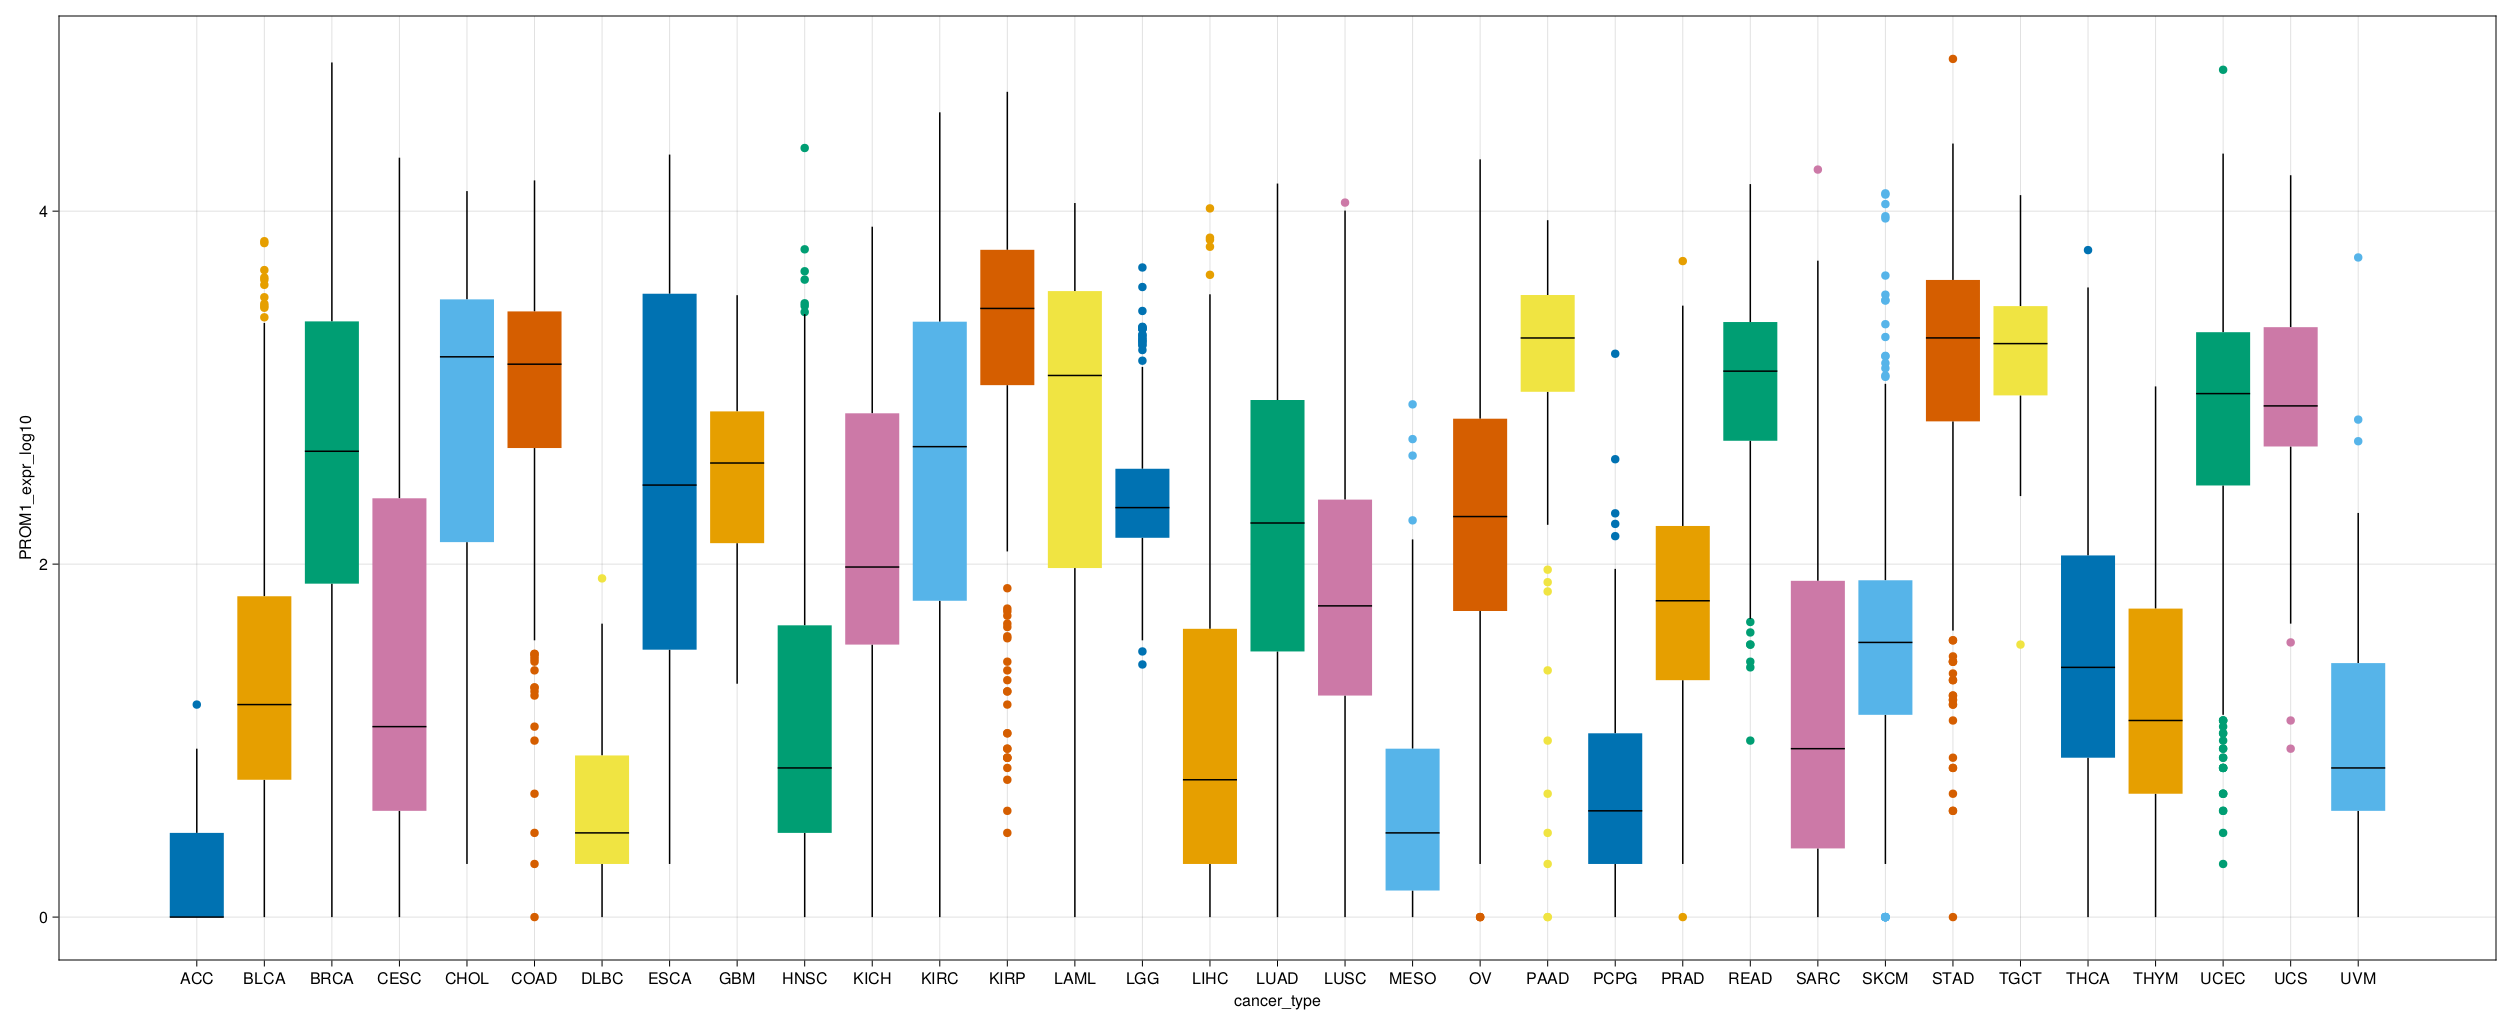

In [113]:
fig = Figure(resolution= (2512,1024))
g = AlgebraOfGraphics.data(DF) * mapping( :cancer_type, :PROM1_expr_log10, color=:cancer_type) * visual(BoxPlot)
draw!(fig[1,1], g)
fig

In [ ]:
BRCA.data[:,BRCA.biotypes .== "protein_coding"]

In [99]:
using UMAP
embedding = umap(Matrix(BRCA.data[:,BRCA.biotypes .== "protein_coding"]'), 3; n_neighbors = 10, min_dist = 1.)

3×1050 Matrix{Float32}:
  2.94872   -3.46529  -0.295014   1.30977  …  -0.414188   0.784974   2.09147
 -6.79532   -6.60135  -3.29362   -5.03908     -6.08714   -4.75861   -6.92205
 -0.734375   2.1184    0.611181   2.628        2.50987    0.591118   4.44782

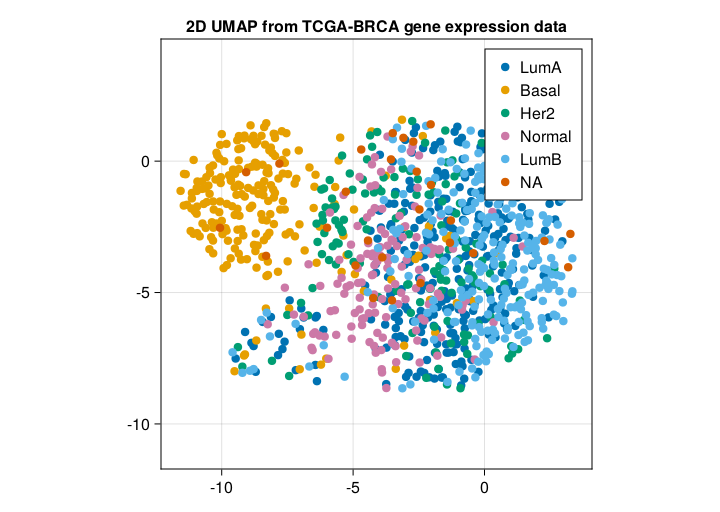

In [4]:
labels = BRCA.labels
fig = Figure(resolution = (720,512))
axis = Axis(fig[1,1], aspect = AxisAspect(1), autolimitaspect = 1,  title="2D UMAP from TCGA-BRCA gene expression data")
for label in unique(labels)
    X = embedding[1, labels .== label]
    Y = embedding[2, labels .== label]
    scatter!(fig[1,1], X,Y, label = label)
end
axislegend(axis) 
fig

In [5]:
using PlotlyJS

In [10]:

x,y,z = sin.(embedding), cos.(embedding)

2×1050 Matrix{Float64}:
  0.149785  -1.18315   -0.542288  …  -0.784873  -0.366899  -0.279028
 -0.341862  -0.892117  -0.202394     -0.684143  -0.342661  -1.25797

([0.14058980991437656, -0.5811864815770612, -0.5055624852454214, -0.19651481032068588, -0.3689951953460685, -0.08370756483695393, 0.15553436418752528, -0.07880168898299703, -0.8408834819137696, -0.8750424732623765  …  -0.2677847014882808, -0.06936152447658049, -0.8873204615179685, -0.2159840671527629, -0.3267645380902733, -0.38592472100096387, 0.37842518510883405, -0.5476924391695414, -0.337867484292094, -0.0847609688620761], [-0.050026512955852906, 0.7206457922271433, 0.10374325674999725, 0.17168152096912423, 0.5656862794295036, 0.2606234538404428, -0.1448199447626117, 0.047870249061783034, 0.509617023622385, 0.4053820193706604  …  0.06733261385008787, 0.07283761579279625, 0.43479626264606963, 0.30355756585731947, 0.3014730354657718, -0.013275100202985852, -0.06692289996084802, 0.44666287904741137, 0.12052889402062546, 0.2620540851988296], [0.9888032429911005, 0.3780104704599984, 0.8565301571990196, 0.9653535024447537, 0.737456154002882, 0.9618047925111133, 0.9771572264255821, 0.99574

In [83]:
sin.(psi) .* cos.(theta)

1050-element Vector{Float64}:
  0.5917262796252334
 -0.594085031341355
 -0.041306241820274286
  0.2287332037925443
 -0.21661972379471536
  0.16523921317139567
  0.6397712530151565
  0.3950546624390645
 -0.7764925523048782
 -0.7163586621272714
  ⋮
  0.3735126698287742
 -0.9378337213556688
  0.10677626392818097
  0.03696214730088804
  0.0853720488223083
  0.7270122280444544
 -0.27966438260549753
  0.12858548167169162
  0.16424505784715349

In [85]:
sin(psi[2]) * cos(theta[2])

-0.594085031341355

In [79]:
mean(embedding .- mean(embedding, dims = 2), dims = 2)

2×1 Matrix{Float32}:
 1.3692038f-7
 3.0622027f-6

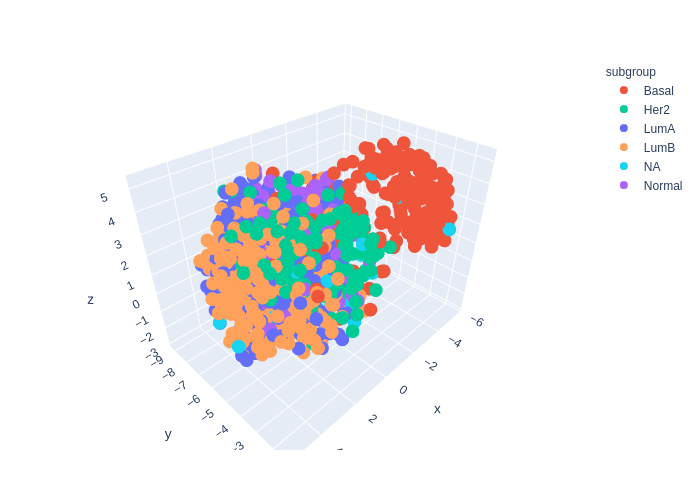

In [100]:
using PlotlyJS, CSV, DataFrames
# psi =((embedding .- mean(embedding, dims = 2))./ (2*pi))[1,:] 
# theta =((embedding .- mean(embedding, dims = 2)) ./ (2*pi))[2,:]
# x,y,z = sin.(psi) .* cos.(theta),  sin.(psi) .* sin.(theta), cos.(psi)

Layout(
        title="Automatic Labels Based on Data Frame Column Names"
    )
PlotlyJS.plot(DataFrame("x" => embedding[1,:],"y" => embedding[2,:],"z" => embedding[3,:],"subgroup"=>BRCA.labels), x=:x,y=:y,z=:z, color=:subgroup,type="scatter3d", mode = "markers")

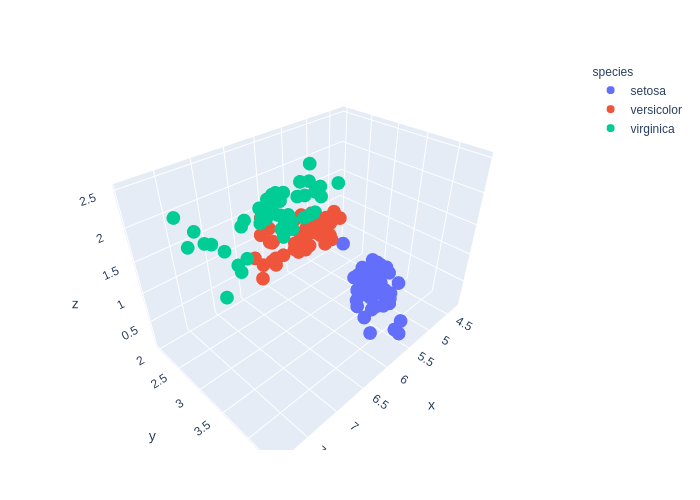

In [58]:
using PlotlyJS, CSV, DataFrames

df = dataset(DataFrame, "iris")
PlotlyJS.plot(
    df,
    x=:sepal_length, y=:sepal_width, z=:petal_width, color=:species,
    type="scatter3d", mode="markers"
)

In [50]:
Projects = unique(DataFrame("case_id" => USI, "project"=> Project_ID));


In [51]:
samples_df = DataFrame(:case_id=>samples, :II=>collect(1:length(samples)))
samples_df = sort(innerjoin(samples_df, Projects, on = :case_id), :II)
    

,case_id,II,project
,String,Int64,Any
1,0004d251-3f70-4395-b175-c94c2f5b1b81,1,TCGA-LIHC
2,000d566c-96c7-4f1c-b36e-fa2222467983,2,TCGA-PRAD
3,0011a67b-1ba9-4a32-a6b8-7850759a38cf,3,TCGA-READ
4,001887aa-36d0-463f-8bca-dec7043b4f2e,4,TCGA-LIHC
5,001944e5-af34-4061-9c09-bb9ea346f6fd,5,TCGA-BLCA
6,001ad307-4ad3-4f1d-b2fc-efc032871c7e,6,TCGA-LGG
7,001cef41-ff86-4d3f-a140-a647ac4b10a1,7,TCGA-BRCA
8,001e0309-9c50-42b0-9e38-347883ee2cd3,8,TCGA-UCEC
9,0020317d-d10e-4e75-8fa6-7c1bdcdee471,9,TCGA-SARC


In [54]:

outfile = h5open("Data/TCGA_tpm_n10384_btypes_labels.h5", "w")
outfile["data"] = log10.(m[samples_df.II,:] .+ 1) 
outfile["samples"] = Array{String}(samples[samples_df.II]) 
outfile["labels"] = Array{String}(samples_df.project) 
outfile["genes"] = Array{String}(genes) 
outfile["biotypes"] = Array{String}(biotypes)
close(outfile)


In [57]:
size(samples)
size(m)
size(genes)
size(biotypes)
size(samples_df.project)
#unique(FULL_CLIN_DF.II)

(10383,)